### Problem Statement

Development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

In [32]:
import os
import glob
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [33]:
# Directory Train images
indian_market_dir = os.path.join('train/indian_market')

onion_dir = os.path.join('train/onion')

potato_dir = os.path.join('train/potato')

tomato_dir = os.path.join('train/tomato')

### This dataset contains a folder train, which has a total of 3135 images, split into four folders as follows:

In [9]:
print('total indian market images:', len(os.listdir(indian_market_dir)))
print('total onion images:', len(os.listdir(onion_dir)))
print('total potato images:', len(os.listdir(potato_dir)))
print('total tomato images:', len(os.listdir(tomato_dir)))

total indian market images: 559
total onion images: 809
total potato images: 858
total tomato images: 749


In [118]:
def get_random_n_items(list_items, n):
  """Gets random n items from a list."""
  random_items = []
  for _ in range(n):
    random_index = random.randint(0, len(list_items) - 1)
    random_items.append(list_items[random_index])
  return random_items

### Making equal amount of images in each training class using Augmentation

In [123]:

from keras.preprocessing.image import ImageDataGenerator

total_potato = len(os.listdir(potato_dir))
# Directory containing original images
folder_path = './train'
for folder in os.listdir(folder_path):
    num_augmented_images = 0
    if folder != 'potato':
        original_images_dir = folder_path + '/' + folder

        # Directory containing the original image
        image_list = os.listdir(original_images_dir)
        random_items = get_random_n_items(image_list, total_potato-len(image_list))
        
        for image_name in random_items:
            
            original_image_path = './train/' + folder + '/' + image_name
            original_image_name = original_image_path.split('/')[-1].split('.')[0]
            # Directory to save augmented images
            augmented_images_dir = folder_path + '/' + folder

            # Number of augmented images to generate
            num_augmented_images = 1

            # Load the original image
            img = plt.imread(original_image_path)

            # Reshape the image to match Keras' input shape
            img = img.reshape((1,) + img.shape)

            # Create the data generator object
            datagen = ImageDataGenerator(
                rotation_range=20,      # Random rotation between -20 and 20 degrees
                width_shift_range=0.1,  # Randomly shift the width by 10%
                height_shift_range=0.1, # Randomly shift the height by 10%
                shear_range=0.2,        # Shear intensity (counter-clockwise direction)
                zoom_range=0.2,         # Random zoom between 80% and 120%
                horizontal_flip=True,   # Randomly flip images horizontally
                fill_mode='nearest'     # Fill any empty pixels with the nearest value
            )

            augmented_images = []
            # Generate augmented images
            for i in range(num_augmented_images):
                try:
                    augmented_img = next(datagen.flow(img, batch_size=1))
                    if folder != 'tomato':
                        # Convert the augmented image to uint8 for saving
                        augmented_img = augmented_img.astype(np.uint8)
                    # Save augmented image
                    save_path = os.path.join(augmented_images_dir, f'augmented_{original_image_name}.jpg')
                    plt.imsave(save_path, augmented_img[0])
                except:
                    pass

### Few images in each class:

indian_market :


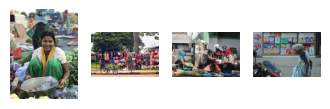

onion :


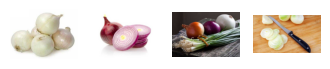

potato :


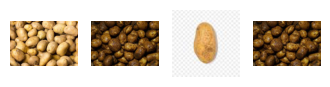

tomato :


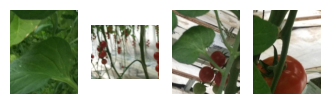

In [10]:
import matplotlib.pyplot as plt

def display_images_rows_columns(folder_path):
  for folder in os.listdir(folder_path):
    print(folder,':')
    images = os.listdir(os.path.join(folder_path, folder))
    fig = plt.figure(figsize=(4, 4))
    column = 0
    for i in range(4):
      column += 1

      fig.add_subplot(1, 4, column)
      image = plt.imread(os.path.join(folder_path, folder, images[i]))
      plt.imshow(image)
      plt.axis('off')
    plt.show()


if __name__ == "__main__":
  folder_path = "C:\\Users\\gokul\\Downloads\\ninjakart\\ninjakart_data\\train"
  display_images_rows_columns(folder_path)

#### Creating validation set

In [11]:
# Create a list to store the paths of all the folders.
folders = os.listdir("D:\\yolo7\\ninjacart_data\\ninjacart_data\\train")

# Iterate through the list of folders and randomly select 10 images from each folder.
for folder in folders:
    if os.path.isdir(folder):
        images = os.listdir(folder)
        random_images = random.sample(images, 40)

        # Create a new folder to store the randomly selected images.
        new_folder = os.path.join("valid", folder)
        os.mkdir(new_folder)

        # Move the randomly selected images to the new folder.
        for image in random_images:
            shutil.move(os.path.join(folder, image), new_folder)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

### Spliting data into train, validation and test

In [34]:
train_data = tf.keras.utils.image_dataset_from_directory("./train/",shuffle =True, seed=123,image_size=(224, 224),batch_size=32)
val_data   = tf.keras.utils.image_dataset_from_directory("./valid/",shuffle =False, seed=123,image_size=(224, 224),batch_size=32)
test_data  = tf.keras.utils.image_dataset_from_directory("./test/",shuffle =False, seed=123,image_size=(224, 224),batch_size=32)

data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[ layers.Rescaling(1.0/255),]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

Found 3422 files belonging to 4 classes.
Found 160 files belonging to 4 classes.
Found 351 files belonging to 4 classes.


In [6]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [7]:
class_dirs = os.listdir("./train/") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'./train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

Count of training samples per class:
            class  count
0  indian_market    856
1          onion    857
2         potato    858
3         tomato    851


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

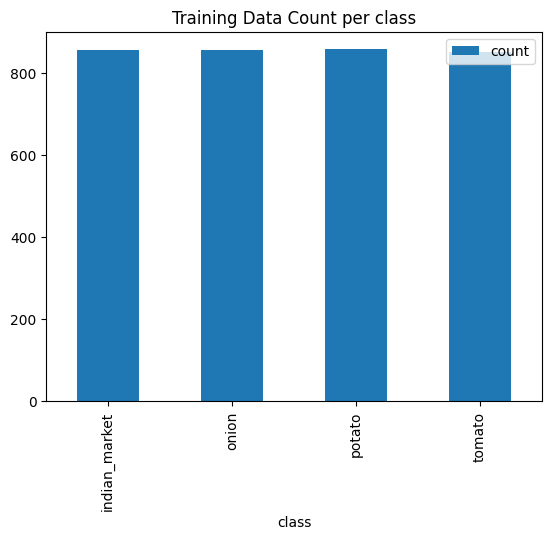

In [8]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")

In [9]:
print(train_data.class_names)

['indian_market', 'onion', 'potato', 'tomato']


# Creating Vgg16 from Scratch

In [100]:
vgg16 = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (224 ,224, 3)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        #tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
        #                activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        #tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
        #                activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        #tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
        #                activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation= 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation= 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation= 'softmax')
        ])


In [101]:
vgg16.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [76]:
import tensorflow as tf
devices = tf.config.list_physical_devices('GPU')
print(len(devices)) 

1


In [77]:
tf.test.is_built_with_cuda()

True

In [102]:
import functools
from tensorflow.keras.optimizers import Adam,SGD
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

opt = SGD(learning_rate=0.005, momentum=0.99)
vgg16.compile(
    optimizer=opt,
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print(vgg16.optimizer.get_config())
history = vgg16.fit(train_ds,  epochs=50,
                    validation_data=val_ds,
                    callbacks = [callback]
                   )

{'name': 'SGD', 'learning_rate': 0.005, 'decay': 0.0, 'momentum': 0.99, 'nesterov': False}
Epoch 1/50
107/107 [==============================] - 50s 449ms/step - loss: 1.3796 - accuracy: 0.2744 - val_loss: 1.4841 - val_accuracy: 0.2500
Epoch 2/50
107/107 [==============================] - 47s 440ms/step - loss: 1.4004 - accuracy: 0.2449 - val_loss: 1.3941 - val_accuracy: 0.2500
Epoch 3/50
107/107 [==============================] - 48s 442ms/step - loss: 1.3905 - accuracy: 0.2475 - val_loss: 1.3869 - val_accuracy: 0.2500
Epoch 4/50
107/107 [==============================] - 47s 440ms/step - loss: 1.3943 - accuracy: 0.2563 - val_loss: 1.3917 - val_accuracy: 0.2500


In [103]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

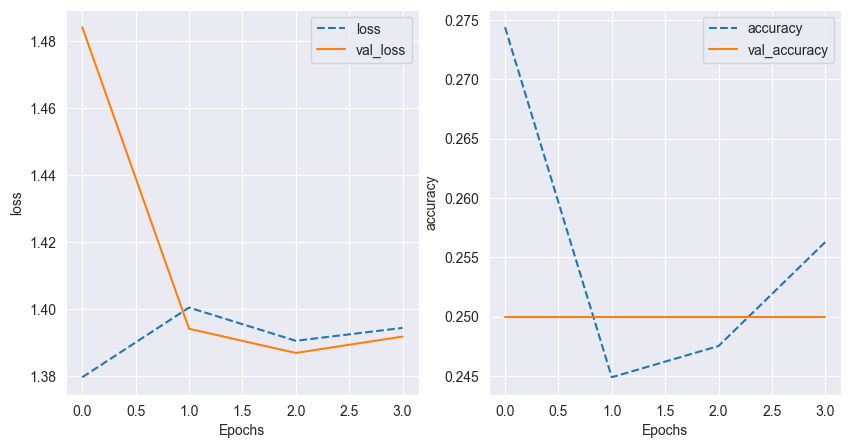

In [104]:
training_plot(['loss', 'accuracy'], history)

In [105]:
# Evaluate the model
loss, acc = vgg16.evaluate(test_ds, verbose=2)
print("model, accuracy: {:5.2f}%".format(100 * acc))

11/11 - 1s - loss: 1.3827 - accuracy: 0.3020 - 1s/epoch - 107ms/step
model, accuracy: 30.20%


In [106]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

11/11 [==============================] - 1s 99ms/step


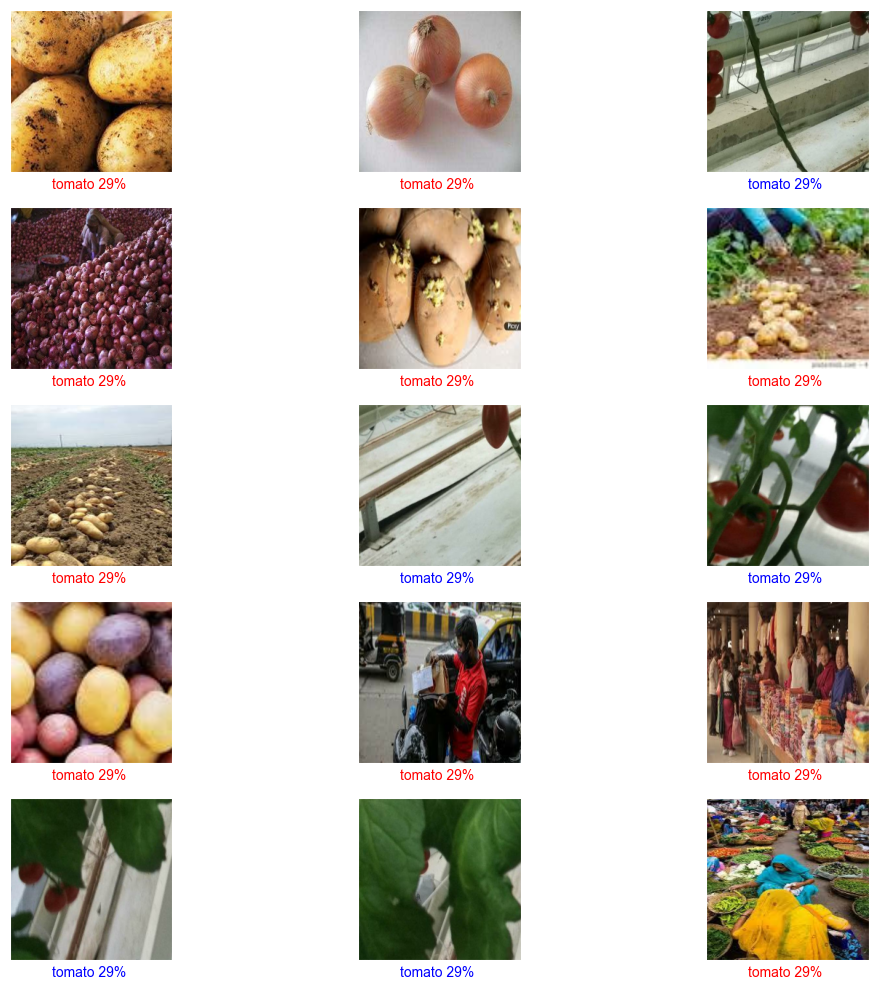

In [107]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

In [135]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16.predict(test_ds)

11/11 [==============================] - 1s 100ms/step


### classification_report:

In [136]:
y_pred = np.argmax(y_pred, axis=0)
report = metrics.classification_report(true_categories, argmax_array, target_names=class_labels)
print(report)  

               precision    recall  f1-score   support

indian_market       1.00      0.83      0.91        81
        onion       0.71      0.90      0.80        83
       potato       0.86      0.77      0.81        81
       tomato       0.99      1.00      1.00       106

     accuracy                           0.88       351
    macro avg       0.89      0.87      0.88       351
 weighted avg       0.90      0.88      0.89       351



### Using pretrained model.

### 1. Pretrained VGG16 on imagenet

In [114]:
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[224,224, 3])
pretrained_model.trainable=False
vgg16_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [115]:
vgg16_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [116]:
import functools
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

vgg16_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [117]:
history = vgg16_model.fit(train_ds, epochs=50,
                    validation_data=val_ds,
                         callbacks=[callback])

Epoch 1/50
107/107 [==============================] - 13s 114ms/step - loss: 0.4000 - accuracy: 0.8475 - val_loss: 0.3535 - val_accuracy: 0.8500
Epoch 2/50
107/107 [==============================] - 12s 111ms/step - loss: 0.1017 - accuracy: 0.9658 - val_loss: 0.5376 - val_accuracy: 0.8188
Epoch 3/50
107/107 [==============================] - 12s 112ms/step - loss: 0.0430 - accuracy: 0.9924 - val_loss: 0.3373 - val_accuracy: 0.8687
Epoch 4/50
107/107 [==============================] - 12s 112ms/step - loss: 0.0217 - accuracy: 0.9991 - val_loss: 0.2992 - val_accuracy: 0.8938
Epoch 5/50
107/107 [==============================] - 12s 112ms/step - loss: 0.0149 - accuracy: 0.9997 - val_loss: 0.3248 - val_accuracy: 0.8875
Epoch 6/50
107/107 [==============================] - 12s 113ms/step - loss: 0.0101 - accuracy: 0.9997 - val_loss: 0.3441 - val_accuracy: 0.8813
Epoch 7/50
107/107 [==============================] - 12s 113ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.3350 - val_ac

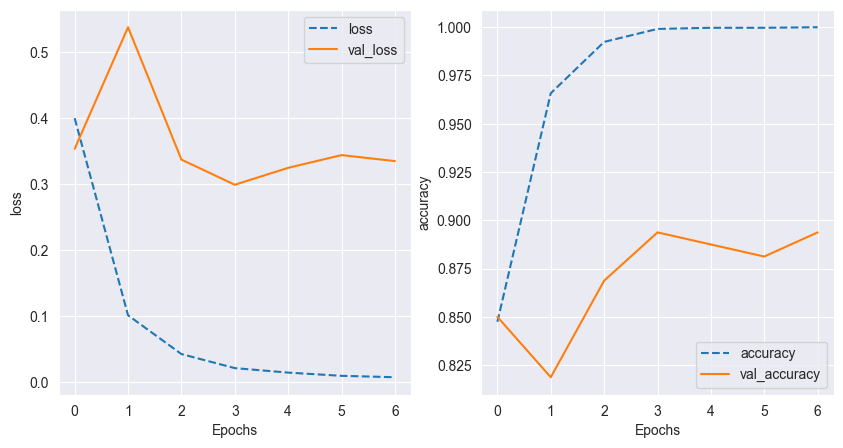

In [118]:
training_plot(['loss', 'accuracy'], history)

In [119]:
# Evaluate the model
loss, acc = vgg16_model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

11/11 - 1s - loss: 0.4995 - accuracy: 0.8661 - 1s/epoch - 105ms/step
Restored model, accuracy: 86.61%


In [120]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

11/11 [==============================] - 1s 99ms/step


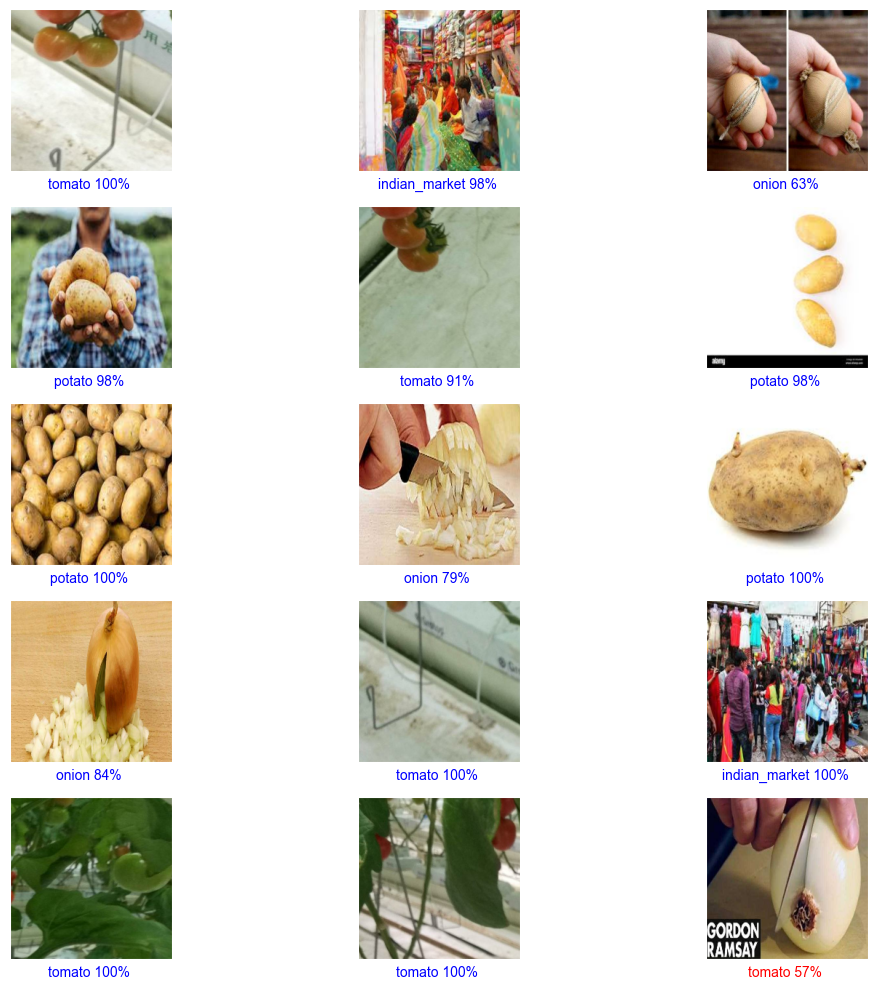

In [121]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

In [133]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16_model.predict(test_ds)

11/11 [==============================] - 1s 98ms/step


#### Confusion matrix : Vgg16 pretrained

In [134]:
y_pred = np.argmax(y_pred, axis=0)
report = metrics.classification_report(true_categories, argmax_array, target_names=class_labels)
print(report)  

               precision    recall  f1-score   support

indian_market       1.00      0.83      0.91        81
        onion       0.71      0.90      0.80        83
       potato       0.86      0.77      0.81        81
       tomato       0.99      1.00      1.00       106

     accuracy                           0.88       351
    macro avg       0.89      0.87      0.88       351
 weighted avg       0.90      0.88      0.89       351



### 2. Pretrained ResNet50V2 on imagenet

In [35]:
# removing the top layer
# flattering the last layer
# Freezing the pre-trained model's layers
pretrained_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=[224,224, 3])
pretrained_model.trainable=False
ResNet50V2_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [36]:
ResNet50V2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 401412    
                                                                 
Total params: 23,966,212
Trainable params: 401,412
Non-trainable params: 23,564,800
_________________________________________________________________


In [37]:
import functools
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

ResNet50V2_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
history = ResNet50V2_model.fit(train_ds, epochs=50,
                    validation_data=val_ds,
                         callbacks=[callback])

Epoch 1/50
107/107 [==============================] - 14s 88ms/step - loss: 1.1322 - accuracy: 0.9109 - val_loss: 0.9190 - val_accuracy: 0.9250
Epoch 2/50
107/107 [==============================] - 8s 76ms/step - loss: 0.3410 - accuracy: 0.9757 - val_loss: 3.3980 - val_accuracy: 0.9000
Epoch 3/50
107/107 [==============================] - 9s 78ms/step - loss: 0.1680 - accuracy: 0.9871 - val_loss: 1.0098 - val_accuracy: 0.9312
Epoch 4/50
107/107 [==============================] - 8s 77ms/step - loss: 0.0351 - accuracy: 0.9953 - val_loss: 1.4331 - val_accuracy: 0.9250


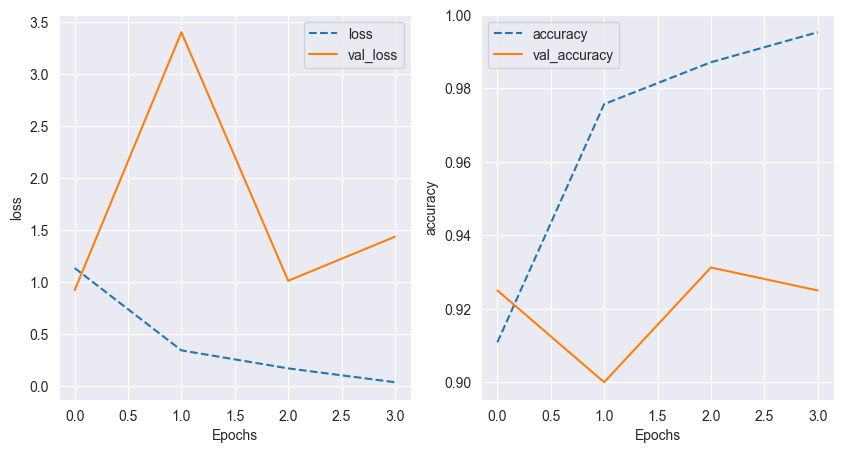

In [52]:
training_plot(['loss', 'accuracy'], history)

In [49]:
# Evaluate the model
loss, acc = ResNet50V2_model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

11/11 - 1s - loss: 4.3915 - accuracy: 0.8832 - 1s/epoch - 95ms/step
Restored model, accuracy: 88.32%


11/11 [==============================] - 1s 86ms/step


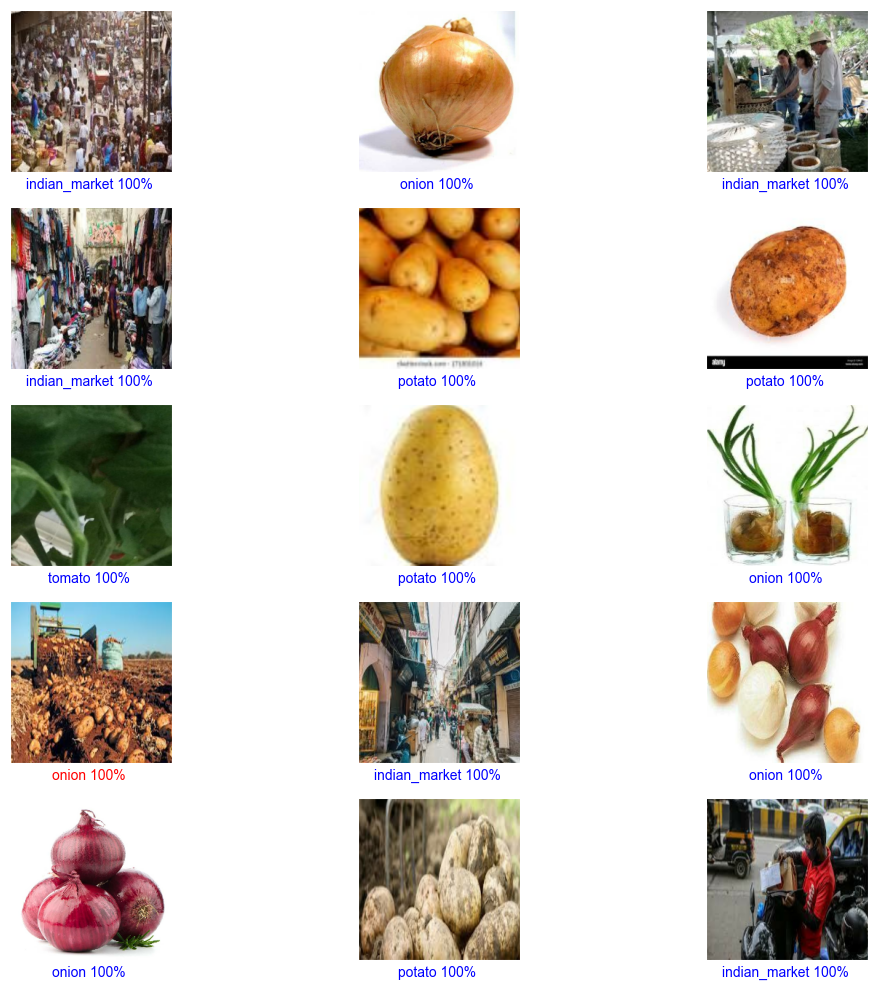

In [53]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = ResNet50V2_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

In [127]:
from sklearn import metrics
class_labels = test_data.class_names
class_labels

['indian_market', 'onion', 'potato', 'tomato']

In [128]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
y_pred = ResNet50V2_model.predict(test_ds)

11/11 [==============================] - 1s 91ms/step


#### Confusion matrix : ResNet50V2 pretrained

In [129]:
y_pred = np.argmax(y_pred, axis=1)
report = metrics.classification_report(true_categories, argmax_array, target_names=class_labels)
print(report)  

               precision    recall  f1-score   support

indian_market       1.00      0.83      0.91        81
        onion       0.71      0.90      0.80        83
       potato       0.86      0.77      0.81        81
       tomato       0.99      1.00      1.00       106

     accuracy                           0.88       351
    macro avg       0.89      0.87      0.88       351
 weighted avg       0.90      0.88      0.89       351



# Summary & Insights

#### 1. This dataset contains a folder train, which has a total of 3135 images, split into four folders as follows:

#### Tomato : 789

#### Potato : 898

#### Onion : 849

#### Indian market : 599

#### 2. To Prevent overfitting removed unbalanced dataset by image augmentation:
#### indian_market    856
#### onion    857
#### potato    858
#### tomato    851

#### 3. Results of Vgg 16 model built from scratch on test set:
#### loss: 1.3973 ,accuracy: 23.08%

#### 4. Results of Pretrained Vgg 16 model on test set:
#### loss: 0.4995 - accuracy: 86.61%

#### 5. Results of Pretrained ResNet50V2 model on test set:
#### loss: 0.43915 - accuracy: 88.32%

### Conclusion : Model build using pretrained ResNet50V2 foundout to be the best model.